In [15]:
import pandas as pd 
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics 
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn import datasets
import pydotplus
from sklearn import svm


In [16]:
data = load_wine()
datas = pd.DataFrame(data = data['data'], columns= data['feature_names'])
datas

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [29]:
from sklearn.model_selection import train_test_split
X = datas.copy()
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [30]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [31]:
from sklearn.metrics import accuracy_score, recall_score

predictions = clf.predict(X_test)
print(predictions)

[1 1 2 1 2 0 2 0 0 0 2 2 0 0 2 0 2 0 1 0 1 1 2 0 0 2 2 2 1 2 0 2 0 2 2 2 2
 0 1 1 0 0 2 0 2 1 0 1 1 0 1 2 1 2]


In [32]:
print(accuracy_score(y_test, predictions))


0.9444444444444444


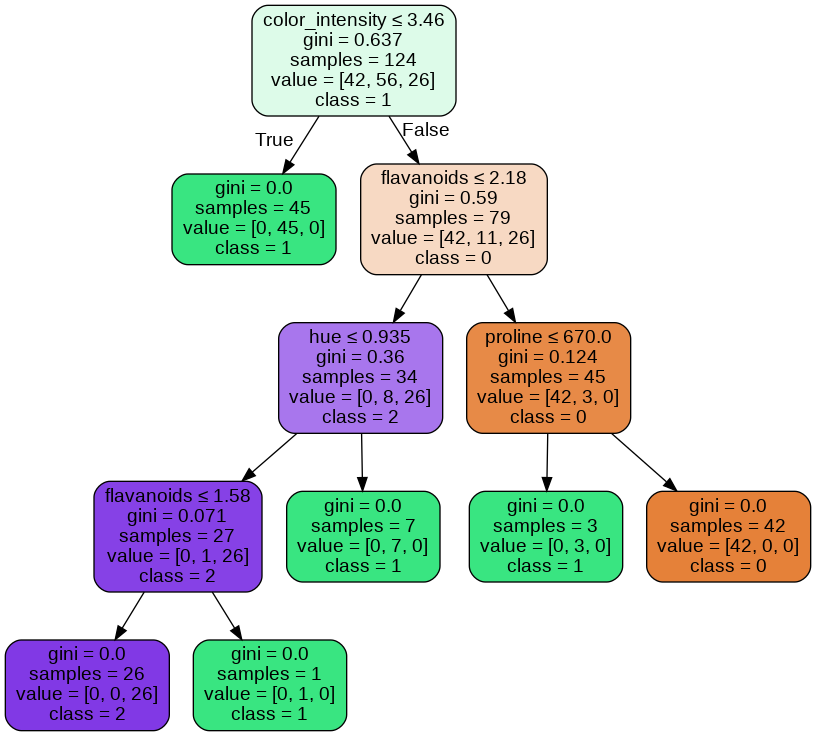

In [33]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('wine.png')
Image(graph.create_png())

In [34]:
clf = svm.SVC(kernel = 'linear' , C = 1).fit(X_train, y_train)
clf.score(X_test, y_test)

1.0